# Ejercicios AA1

## 1. Entorno de desarrollo y librerías básicas.

### 1.1 Librería Pandas

In [59]:
import pandas as pd

# Leer el archivo anterior y mostrar el número de elementos que posee, el número de columnas y sus nombres
df = pd.read_csv('parte1/data/coches.csv')

print(f'Número de elementos: {df.size}')
print(f'Número de columnas: {df.shape[1]}')
print(f'Nombres de las columnas: {df.columns.tolist()}')

# Mostrar de las 5 primeras filas solo la marca y el modelo
print(df[['marca', 'modelo']].head())

# Obtener cuantas marcas diferentes y cuáles son
print(f'Número de marcas diferentes: {df.marca.nunique()}')
print(f'Marcas diferentes: {df.marca.unique()}')

# Mostrar los coches de la marca Opel
print(df[df.marca == 'Opel'])

# Calcular los km promedio de cada marca
print(df.groupby('marca').kms.mean())

# Sumar 1000 euros al precio de los coches de año posterior a 2015
df.loc[df.año > 2015, 'precio'] += 1000
print(df.loc[df.año > 2015])

Número de elementos: 30
Número de columnas: 6
Nombres de las columnas: ['matrícula', 'marca', 'modelo', 'año', 'kms', 'precio']
       marca  modelo
0     Toyota   Camry
1      Honda  Accord
2       Ford  Fusion
3  Chevrolet  Malibu
4     Nissan  Altima
Número de marcas diferentes: 5
Marcas diferentes: ['Toyota' 'Honda' 'Ford' 'Chevrolet' 'Nissan']
Empty DataFrame
Columns: [matrícula, marca, modelo, año, kms, precio]
Index: []
marca
Chevrolet    34987.0
Ford         22456.0
Honda        30278.0
Nissan       38163.0
Toyota       25153.0
Name: kms, dtype: float64
  matrícula      marca  modelo   año    kms  precio
0    ABC123     Toyota   Camry  2019  25153    6300
1    XYZ456      Honda  Accord  2018  30278   10000
2    DEF789       Ford  Fusion  2020  22456    5000
3    GHI012  Chevrolet  Malibu  2017  34987    8500
4    JKL345     Nissan  Altima  2016  38163    4200


### 1.2 Librería Numpy

In [60]:
import numpy as np
# Crear un vector de tamaño 10 de ceros excepto el quinto elemento que será 1.
v = np.zeros(10)
v[4] = 1
print(v)

print("--------------------")

# Crear un vector con valores entre 10 y 49.
v = np.random.randint(10,49, size=(1,10))
print(v)

print("--------------------")


# Crear una matriz de 3x3 con valores entre 0 y 8.
v = np.random.randint(0,8, size=(3,3))
print(v)

print("--------------------")

# Crear una matriz identidad de dimensiones 4x4.
v = np.eye(4)
print(v)

print("--------------------")

# Crear un array de dimensiones 3x3x3 con valores aleatorios.
v = np.random.random((3,3,3))
print(v)

print("--------------------")

# Crear una matriz de 5x5 con 1 en los bordes y 0 en el interior.
v = np.ones((5,5))
v[1:-1,1:-1] = 0
print(v)

print("--------------------")

# Crear un vector de tamaño 10 con valores aleatorios y modificar el valor máximo por 0.
v = np.random.random(10)
v[v == v.max()] = 0
print(v)

print("--------------------")

# ¿Cómo encontrar el valor más próximo a un escalar dado, en un vector?
v = np.random.randint(0, 25, size=(1,10))
print(v)
escalar = 1
v2 = np.abs(v - escalar)
print(f"El valor más cercano a {escalar} es {v.argmin()} y se encuentra en la posición {v.min()}")

print("--------------------")

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
--------------------
[[38 48 13 40 11 22 40 15 11 43]]
--------------------
[[1 4 6]
 [6 4 3]
 [4 3 1]]
--------------------
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
--------------------
[[[0.23979587 0.37029607 0.11916815]
  [0.71228928 0.42144608 0.22822206]
  [0.07917878 0.95092874 0.06426453]]

 [[0.04038174 0.63070127 0.78080605]
  [0.40660452 0.3565501  0.72825814]
  [0.17730502 0.06260703 0.72053325]]

 [[0.95249912 0.83041673 0.70334455]
  [0.41743256 0.07049084 0.30415275]
  [0.68387939 0.65299816 0.63949297]]]
--------------------
[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]
--------------------
[0.65150465 0.41155247 0.15308502 0.09031613 0.         0.3111903
 0.7217978  0.45045996 0.40163467 0.05943183]
--------------------
[[14 16 17  5 17 22 10 17 19 19]]
El valor más cercano a 1 es 3 y se encuentra en la posición 5
--------------------


## 2 Preprocesado básico de datos

### Ejercicios propuestos

In [61]:
# Utilizando los datos del archivo iris-perdidos.csv, sustituir para cada variable 
# los valores perdidos por el promedio de los valores de dicha variable.

df = pd.read_csv('parte1/data/iris-perdidos.csv', sep = ',')

for col in df.columns[:-1]:
    df[col].fillna(df[col].mean())

print(df)

# Implementar una función que acepte un array unidimensional y dos valores reales,
# minimo y maximo, y realice el escalado del array entre los valores minimo y
# maximo.

def escalar(arr, minimo, maximo):
    return (arr - arr.min()) / (arr.max() - arr.min()) * (maximo - minimo)

print(escalar(np.array([1,2,3,4,5]), 0, 1))

# Implementar una clase en Python que permita convertir valores simbólicos a nu-
# méricos. La clase además del constructor debe poseer los métodos convertir,
# convertir_inversa. El primer método admite un array con valores simbólicos
# y devuelve otro array con los valores numéricos. El segundo método debe tomar
#como entrada un array que previamente fue convertido a numérico y devolver el
# correspondiente con valores simbólicos.

class Convertidor:
    def __init__(self):
        self.mapa = {}
        self.contador = 0

    def convertir(self, arr):
        for i in arr:
            if i not in self.mapa:
                self.mapa[i] = self.contador
                self.contador += 1
        return np.array([self.mapa[i] for i in arr])

    def convertir_inversa(self, arr):
        return np.array([list(self.mapa.keys())[list(self.mapa.values()).index(i)] for i in arr])
    
c = Convertidor()
arr = np.array(['a', 'b', 'c', 'a', 'b', 'c'])
arr_num = c.convertir(arr)
print(arr_num)
arr_simb = c.convertir_inversa(arr_num)
print(arr_simb)

     sepal length  sepal width  petal length  petal width           class
0             NaN          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
[0.   0.25 0.5  0.75 1.  ]
[0 1 2 0 1 2]
['a' 'b' 'c' 'a' 'b' 'c']


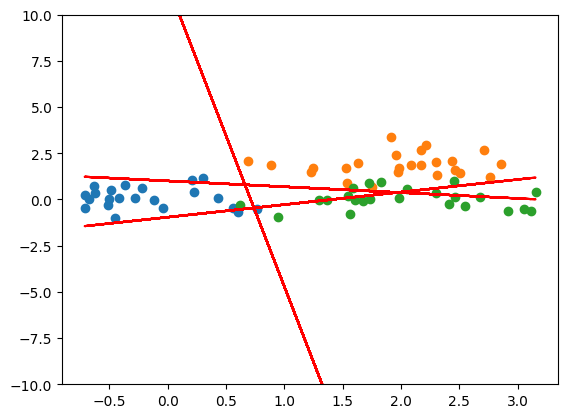

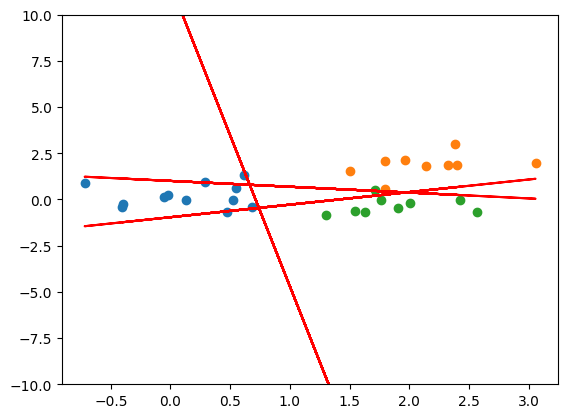

0.9333333333333333


In [68]:
# Ejercico 6

# Generar un conjunto de datos sintéticos con 100 muestras utilizando la función
# make_blobs con dos características y tres clases. Las clases estarán centradas en
# el espacio de características en ((0,0), (2,2), (2,0])) y desviación estándar para los
# clusters igual a 0.6

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100, centers=[(0,0), (2,2), (2,0)], cluster_std=0.6, random_state=567)


n_clases=3

# Dividir el conjunto de datos en 70 % de las muestras para entrenamiento y el resto
# para test usando como semilla el valor 567; y obtener el clasificador mediante el
# método Perceptrón.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=567)
clf = Perceptron()
clf.fit(X_train, y_train)

# Dibujar las muestras de entrenamiento y las superficies de decisión.

for clase in range(n_clases):
    m = -clf.coef_[clase][0] / clf.coef_[clase][1]
    n = -clf.intercept_[clase] / clf.coef_[clase][1]
    recta = X_train[:,0] * m + n
    puntos_clase = y_train == clase
    plt.scatter(X_train[puntos_clase,0], X_train[puntos_clase, 1])
    plt.plot(X_train[:,0], recta, 'r')
plt.ylim(-10, 10)
plt.show()

# Dibujar las muestras de test y las superficies de decisión.

for clase in range(n_clases):
    m = -clf.coef_[clase][0] / clf.coef_[clase][1]
    n = -clf.intercept_[clase] / clf.coef_[clase][1]
    recta = X_test[:,0] * m + n
    puntos_clase = y_test == clase
    plt.scatter(X_test[puntos_clase,0], X_test[puntos_clase, 1])
    plt.plot(X_test[:,0], recta, 'r')
plt.ylim(-10, 10)
plt.show()

# Obtener la exactitud del clasificador en el conjunto de test y analizar el resultado de
# acuerdo a la gráfica del apartado anterior.

from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [93]:
# Leer el conjunto de entrenamiento y de test de los archivos CelebA-1K-train.csv
# y CelebA-1K-test.csv respectivamente

train = pd.read_csv('datos_p5/CelebA-1K-train.csv')
train = train.drop(columns=['Image_name'])
test = pd.read_csv('datos_p5/CelebA-1K-test.csv')
test = test.drop(columns=['Image_name'])

# Entrenar un clasificador biclásico utilizando el método Perceptrón y obtener la tasa
# de acierto del clasificador en las muestras del conjunto de test (utilizar la función
# accuracy_score y en el conjunto de train.

clf = Perceptron()
clf.fit(train.iloc[:,1:], train.iloc[:,0])
y_pred = clf.predict(test.iloc[:,1:])
print(accuracy_score(test.iloc[:,0], y_pred))

0.844
